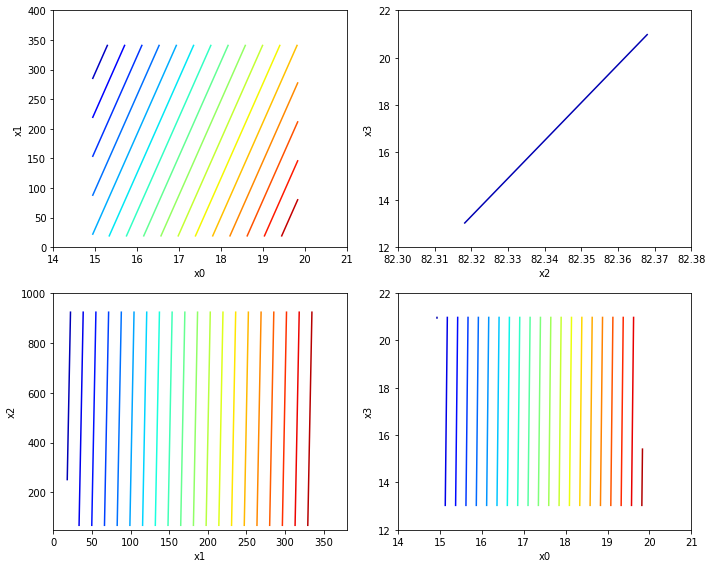

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def f(x):
    return 0.608 * x[0] - 0.00380 * x[1] + 0.00115 * x[2] + 0.00765 * x[3]

df2 = pd.read_excel(r'C:/Users/polin/Dropbox/EE 608 spring 2023/project/Wine-Quality-Modeling/data/bordeauxWeather.xlsx')
avgTempSept = df2['sepT'].values.tolist()
avgTempGrowing = df2['avgTempAprilSeptember'].values.tolist()
totalPrecipAug = df2['totalPSeptAug'].values.tolist()
totalPrecipWinter = df2['totalPOctMar'].values.tolist()

TempAprSep=np.array(avgTempGrowing)
AugPrecip=np.array(totalPrecipAug)
WinterPrecip=np.array(totalPrecipWinter)
SepTempAvg=np.array(avgTempSept)

maxTempSep=max(SepTempAvg)
minTempSep=min(SepTempAvg)

maxTempAprSep=max(TempAprSep)
minTempAprSep=min(TempAprSep)

maxPrecipAug=max(totalPrecipAug)
minPrecipAug=min(totalPrecipAug)

maxPrecipWinter=max(totalPrecipWinter)
minPrecipWinter=min(totalPrecipWinter)

x0_min = minTempAprSep
x0_max = maxTempAprSep
x1_min = minPrecipAug
x1_max = maxPrecipAug
x2_min = minPrecipWinter
x2_max = maxPrecipWinter
x3_min = minTempSep
x3_max = maxTempSep

# Fix two variables and vary the other two within bounds
fixed_var_1 = 0
fixed_var_2 = 0


# WITHOUT YEAR
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Generate a grid of x values for the varying variables
x0_vals = np.linspace(x0_min, x0_max, 100)
x1_vals = np.linspace(x1_min, x1_max, 100)
# Create a meshgrid from the varying x values
x0, x1 = np.meshgrid(x0_vals, x1_vals)
# Initialize the Z values
z = np.zeros_like(x0)
# Calculate the corresponding function values
for i in range(len(x0_vals)):
    for j in range(len(x1_vals)):
        x = [x0_vals[i], x1_vals[j], fixed_var_1, fixed_var_2]
        z[j, i] = f(x)
# Plot the contour
axs[0, 0].contour(x0, x1, z, levels=20, cmap='jet')
axs[0, 0].set_xlabel('x0')
axs[0, 0].set_ylabel('x1')
axs[0, 0].set_xlim(14, 21)
axs[0, 0].set_ylim(0, 400)


# Generate a grid of x values for the varying variables
x2_vals = np.linspace(x2_min, x2_max, 100)
x3_vals = np.linspace(x3_min, x3_max, 100)
# Create a meshgrid from the varying x values
x2, x3 = np.meshgrid(x2_vals, x3_vals)
# Initialize the Z values
z = np.zeros_like(x2)
# Calculate the corresponding function values
for i in range(len(x2_vals)):
    for j in range(len(x3_vals)):
        x = [x2_vals[i], x3_vals[j], fixed_var_1, fixed_var_2]
        z[j, i] = f(x)
# Plot the contour
axs[0, 1].contour(x2, x3, z, levels=20, cmap='jet')
axs[0, 1].set_xlabel('x2')
axs[0, 1].set_ylabel('x3')
axs[0, 1].set_xlim(82.3, 82.38)
axs[0, 1].set_ylim(12, 22)

# Generate a grid of x values for the varying variables
x1_vals = np.linspace(x1_min, x1_max, 100)
x2_vals = np.linspace(x2_min, x2_max, 100)
# Create a meshgrid from the varying x values
x1, x2 = np.meshgrid(x1_vals, x2_vals)
# Initialize the Z values
z = np.zeros_like(x1)
# Calculate the corresponding function values
for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        x = [x1_vals[i], x2_vals[j], fixed_var_1, fixed_var_2]
        z[j, i] = f(x)
# Plot the contour
axs[1, 0].contour(x1, x2, z, levels=20, cmap='jet')
axs[1, 0].set_xlabel('x1')
axs[1, 0].set_ylabel('x2')
axs[1, 0].set_xlim(0, 380)
axs[1, 0].set_ylim(50, 1000)

# Generate a grid of x values for the varying variables
x0_vals = np.linspace(x0_min, x0_max, 100)
x3_vals = np.linspace(x3_min, x3_max, 100)
# Create a meshgrid from the varying x values
x0, x3 = np.meshgrid(x0_vals, x3_vals)
# Initialize the Z values
z = np.zeros_like(x0)
# Calculate the corresponding function values
for i in range(len(x0_vals)):
    for j in range(len(x3_vals)):
        x = [x0_vals[i], x3_vals[j], fixed_var_1, fixed_var_2]
        z[j, i] = f(x)
# Plot the contour
axs[1, 1].contour(x0, x3, z, levels=20, cmap='jet')
axs[1, 1].set_xlabel('x0')
axs[1, 1].set_ylabel('x3')
axs[1, 1].set_xlim(14, 21)
axs[1, 1].set_ylim(12, 22)

plt.tight_layout()
plt.show()


In [53]:
import sympy as sp

# WITHOUT YEAR
# Define the variables
x = sp.symbols('x0 x1 x2 x3')

# Define the function
f = 0.608 * x[0] - 0.00380 * x[1] + 0.00115 * x[2] + 0.00765 * x[3]
# Calculate the Hessian matrix
hessian = sp.hessian(f, x)
# Check the eigenvalues of the Hessian matrix
eigenvalues = hessian.eigenvals()
# Check the signs of eigenvalues
positive_eigenvalues = all([eigval > 0 for eigval in eigenvalues.keys()])
negative_eigenvalues = all([eigval < 0 for eigval in eigenvalues.keys()])
print(hessian)
if positive_eigenvalues:
    print("The function is convex.")
elif negative_eigenvalues:
    print("The function is concave.")
else:
    print("The function is neither convex nor concave.")

# WITH YEAR
# Define the variables
x = sp.symbols('x0 x1 x2 x3 x4')
# Define the function
f = .240*x[0] + 0.608 * x[1] - 0.00380 * x[2] + 0.00115 * x[3] + 0.00765 * x[4]
# Calculate the Hessian matrix
hessian = sp.hessian(f, x)
# Check the eigenvalues of the Hessian matrix
eigenvalues = hessian.eigenvals()
# Check the signs of eigenvalues
positive_eigenvalues = all([eigval > 0 for eigval in eigenvalues.keys()])
negative_eigenvalues = all([eigval < 0 for eigval in eigenvalues.keys()])
print(hessian)
if positive_eigenvalues:
    print("The function is convex.")
elif negative_eigenvalues:
    print("The function is concave.")
else:
    print("The function is neither convex nor concave.")


Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
The function is neither convex nor concave.
Matrix([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
The function is neither convex nor concave.
